# Análisis de Datos de Fraude en Seguros de Auto / Redes Neuronales / R

# 2 Procesamiento de los Datos

# 2.1 Carga de librerías

In [ ]:
# Instalamos Keras y Tensorflow

install.packages("keras")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘RcppTOML’, ‘here’, ‘png’, ‘config’, ‘tfautograph’, ‘reticulate’, ‘tensorflow’, ‘tfruns’, ‘zeallot’




In [ ]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
install.packages("RANN")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("performanceEstimation")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘BBmisc’, ‘checkmate’, ‘parallelMap’




In [ ]:
# Cargamos las liberías a utilizar

library(dplyr)
library(keras)
library(caret)
library(RANN)
library(performanceEstimation)

Loading required package: ggplot2

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


# 2.2 Carga de Datos

In [ ]:
# Cargamos los datos
archivo <- "/content/sample_data/Dataset.csv"
car_fraud <- read.csv(archivo)
head(car_fraud)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,⋯,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>
1,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,⋯,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069
2,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,⋯,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.456
3,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,⋯,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941
4,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,⋯,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153
5,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,⋯,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374
6,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,⋯,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision,57166.761


In [ ]:
# Mostramos el número de filas y columnas
dim(car_fraud)

[1] 11565    34

# 2.3 Codificación de Datos Categóricos

In [ ]:
# Convertimos a factor las variables categóricas ordinales y nominales
car_fraud$FraudFound_P <- factor(car_fraud$FraudFound_P)
car_fraud$Month <- as.numeric(factor(car_fraud$Month,
                          levels = c('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'),
                          labels = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)))
car_fraud$DayOfWeek <- as.numeric(factor(car_fraud$DayOfWeek,
                              levels = c('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'),
                              labels = c(1, 2, 3, 4, 5, 6, 7)))
car_fraud$Make <- as.numeric(factor(car_fraud$Make,
                        levels = c('Accura', 'BMW', 'Chevrolet', 'Dodge', 'Ferrari', 'Ford', 'Honda', 'Jaguar', 'Lexus', 'Mazda', 'Mecedes', 'Mercury', 'Nisson', 'Pontiac', 'Porche', 'Saab', 'Saturn', 'Toyota', 'VW'),
                        labels = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)))
car_fraud$AccidentArea <- as.numeric(factor(car_fraud$AccidentArea,
                                levels = c('Rural', 'Urban'),
                                labels = c(1, 2)))
car_fraud$DayOfWeekClaimed <- as.numeric(factor(car_fraud$DayOfWeekClaimed,
                                    levels = c('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'),
                                    labels = c(1, 2, 3, 4, 5, 6, 7)))
car_fraud$MonthClaimed <- as.numeric(factor(car_fraud$MonthClaimed,
                                levels = c('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'),
                                labels = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)))
car_fraud$Sex <- as.numeric(factor(car_fraud$Sex,
                        levels = c('Male', 'Female'),
                        labels = c(1, 2)))
car_fraud$MaritalStatus <- as.numeric(factor(car_fraud$MaritalStatus,
                                  levels = c('Single', 'Married', 'Widow', 'Divorced'),
                                  labels = c(1, 2, 3, 4)))
car_fraud$Fault <- as.numeric(factor(car_fraud$Fault,
                          levels = c('Policy Holder', 'Third Party'),
                          labels = c(1, 2)))
car_fraud$PolicyType <- as.numeric(factor(car_fraud$PolicyType,
                              levels = c('Sport - Liability', 'Sport - Collision', 'Sedan - Liability', 'Sedan - All Perils', 'Sedan - Collision', 'Utility - Collision', 'Utility - Liability', 'Utility - All Perils', 'Sport - All Perils'),
                              labels = c(1, 2, 3, 4, 5, 6, 7, 8, 9)))
car_fraud$VehicleCategory <- as.numeric(factor(car_fraud$VehicleCategory,
                                    levels = c('Sport', 'Sedan', 'Utility'),
                                    labels = c(1, 2, 3)))
car_fraud$VehiclePrice <- as.numeric(factor(car_fraud$VehiclePrice,
                                levels = c('less than 20000', '20000 to 29000', '30000 to 39000', '40000 to 59000', '60000 to 69000', 'more than 69000'),
                                labels = c(1, 2, 3, 4, 5, 6)))
car_fraud$Days_Policy_Accident <- as.numeric(factor(car_fraud$Days_Policy_Accident,
                                        levels = c('none', '1 to 7', '8 to 15', '15 to 30', 'more than 30'),
                                        labels = c(1, 2, 3, 4, 5)))
car_fraud$Days_Policy_Claim <- as.numeric(factor(car_fraud$Days_Policy_Claim,
                                      levels = c('none', '8 to 15', '15 to 30', 'more than 30'),
                                      labels = c(1, 2, 3, 4)))
car_fraud$PastNumberOfClaims <- as.numeric(factor(car_fraud$PastNumberOfClaims,
                                      levels = c('none', '1', '2 to 4', 'more than 4'),
                                      labels = c(1, 2, 3, 4)))
car_fraud$AgeOfVehicle <- as.numeric(factor(car_fraud$AgeOfVehicle,
                                levels = c('new', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', 'more than 7'),
                                labels = c(1, 2, 3, 4, 5, 6, 7, 8)))
car_fraud$AgeOfPolicyHolder <- as.numeric(factor(car_fraud$AgeOfPolicyHolder,
                                      levels = c('16 to 17', '18 to 20', '21 to 25', '26 to 30', '31 to 35', '36 to 40', '41 to 50', '51 to 65', 'over 65'),
                                      labels = c(1, 2, 3, 4, 5, 6, 7, 8, 9)))
car_fraud$PoliceReportFiled <- as.numeric(factor(car_fraud$PoliceReportFiled,
                                      levels = c('No', 'Yes'),
                                      labels = c(1, 2)))
car_fraud$WitnessPresent <- as.numeric(factor(car_fraud$WitnessPresent,
                                  levels = c('No', 'Yes'),
                                  labels = c(1, 2)))
car_fraud$AgentType <- as.numeric(factor(car_fraud$AgentType,
                              levels = c('External', 'Internal'),
                              labels = c(1, 2)))
car_fraud$NumberOfSuppliments <- as.numeric(factor(car_fraud$NumberOfSuppliments,
                                      levels = c('none', '1 to 2', '3 to 5', 'more than 5'),
                                      labels = c(1, 2, 3, 4)))
car_fraud$AddressChange_Claim <- as.numeric(factor(car_fraud$AddressChange_Claim,
                                        levels = c('no change', 'under 6 months', '1 year', '2 to 3 years', '4 to 8 years'),
                                        labels = c(1, 2, 3, 4, 5)))
car_fraud$NumberOfCars <- as.numeric(factor(car_fraud$NumberOfCars,
                                levels = c('1 vehicle', '2 vehicles', '3 to 4', '5 to 8', 'more than 9'),
                                labels = c(1, 2, 3, 4, 5)))
car_fraud$BasePolicy <- as.numeric(factor(car_fraud$BasePolicy,
                                          levels = c('Liability', 'Collision', 'All Perils'),
                                          labels = c(1, 2, 3)))

head(car_fraud)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,⋯,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,12,5,3,7,2,2,1,1,2,1,⋯,4,1,1,1,1,3,3,1994,1,55526.069
2,1,3,3,7,2,1,1,4,1,1,⋯,5,2,1,1,1,1,1,1994,2,59294.456
3,10,5,5,7,2,4,11,2,1,2,⋯,7,1,1,1,1,1,1,1994,2,71756.941
4,6,2,6,18,1,5,7,1,1,2,⋯,8,2,1,1,4,1,1,1994,1,7584.153
5,2,1,6,7,2,1,2,3,1,2,⋯,6,1,1,1,2,1,1,1994,2,98545.374
6,12,4,6,7,2,3,12,5,1,1,⋯,5,1,2,1,3,1,1,1994,2,57166.761


# 2.4 División de los Datos

In [ ]:
# Dividimos los datos
dataframe <- select(car_fraud, -PolicyNumber) # quitamos la variable identidad
dim(dataframe)
X <- select(dataframe, -FraudFound_P) # quitamos la variable objetivo
dim(X)

[1] 11565    33

[1] 11565    32

#  2.5 Limpieza de Datos y Escalamiento de Variables

In [ ]:
# Mostramos la suma de valores nulos
sapply(X, function(x) sum(is.na(x)))

Month          WeekOfMonth            DayOfWeek 
                   0                    0                    0 
                Make         AccidentArea     DayOfWeekClaimed 
                   0                    0                    1 
        MonthClaimed   WeekOfMonthClaimed                  Sex 
                   1                    0                    0 
       MaritalStatus                  Age                Fault 
                   0                    5                    0 
          PolicyType      VehicleCategory         VehiclePrice 
                   0                    0                    0 
           RepNumber           Deductible         DriverRating 
                   0                    0                    6 
Days_Policy_Accident    Days_Policy_Claim   PastNumberOfClaims 
                   0                    0                    0 
        AgeOfVehicle    AgeOfPolicyHolder    PoliceReportFiled 
                   0                    0                    0 
      WitnessPresent            AgentType  NumberOfSuppliments 
                   0                    0                    0 
 AddressChange_Claim         NumberOfCars                 Year 
                   0                    1                    0 
          BasePolicy            ClaimSize 
                   0                    0

In [ ]:
# Mostramos la suma de valores cero
sapply(X, function(x) sum(x == 0, na.rm = TRUE))

Month          WeekOfMonth            DayOfWeek 
                   0                    0                    0 
                Make         AccidentArea     DayOfWeekClaimed 
                   0                    0                    0 
        MonthClaimed   WeekOfMonthClaimed                  Sex 
                   0                    0                    0 
       MaritalStatus                  Age                Fault 
                   0                  253                    0 
          PolicyType      VehicleCategory         VehiclePrice 
                   0                    0                    0 
           RepNumber           Deductible         DriverRating 
                   0                    0                    0 
Days_Policy_Accident    Days_Policy_Claim   PastNumberOfClaims 
                   0                    0                    0 
        AgeOfVehicle    AgeOfPolicyHolder    PoliceReportFiled 
                   0                    0                    0 
      WitnessPresent            AgentType  NumberOfSuppliments 
                   0                    0                    0 
 AddressChange_Claim         NumberOfCars                 Year 
                   0                    0                    0 
          BasePolicy            ClaimSize 
                   0                    6

In [ ]:
# Reemplazamos los valores iguales a cero por NA
X[X == 0] <- NA
sapply(X, function(x) sum(is.na(x)))

Month          WeekOfMonth            DayOfWeek 
                   0                    0                    0 
                Make         AccidentArea     DayOfWeekClaimed 
                   0                    0                    1 
        MonthClaimed   WeekOfMonthClaimed                  Sex 
                   1                    0                    0 
       MaritalStatus                  Age                Fault 
                   0                  258                    0 
          PolicyType      VehicleCategory         VehiclePrice 
                   0                    0                    0 
           RepNumber           Deductible         DriverRating 
                   0                    0                    6 
Days_Policy_Accident    Days_Policy_Claim   PastNumberOfClaims 
                   0                    0                    0 
        AgeOfVehicle    AgeOfPolicyHolder    PoliceReportFiled 
                   0                    0                    0 
      WitnessPresent            AgentType  NumberOfSuppliments 
                   0                    0                    0 
 AddressChange_Claim         NumberOfCars                 Year 
                   0                    1                    0 
          BasePolicy            ClaimSize 
                   0                    6

In [ ]:
# Imputamos los valores nulos con "knnImpute" y estandarizamos los datos númericos con "center" y "scale"
imputer <- preProcess(X, method = c("knnImpute"))
imputer

Created from 11294 samples and 32 variables

Pre-processing:
  - centered (32)
  - ignored (0)
  - 5 nearest neighbor imputation (32)
  - scaled (32)


In [ ]:
# Transformamos los valores nulos y transformamos los datos númericos a media = 0 y sd = 1
transformed <- predict(imputer, dataframe)
head(transformed)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,⋯,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.6079156,1.7247063,-0.4041146,-0.7766482,0.3416633,-0.5682662,-1.5475373,-1.3521144,2.3313636,-1.4456299,⋯,-1.35251558,-0.1713767,-0.07690302,-0.1225014,-0.9350302,1.9072428,4.863351,-1.080042,-1.23190636,1.2062718
2,-1.5573324,0.1681097,-0.4041146,-0.7766482,0.3416633,-1.2583251,-1.5475373,1.0323325,-0.4288964,-1.4456299,⋯,-0.64026009,5.8345960,-0.07690302,-0.1225014,-0.9350302,-0.2744845,-0.264274,-1.080042,0.04630978,1.3458895
3,1.0324160,1.7247063,0.6011737,-0.7766482,0.3416633,0.8118515,1.3324591,-0.5572987,-0.4288964,0.5905057,⋯,0.78425087,-0.1713767,-0.07690302,-0.1225014,-0.9350302,-0.2744845,-0.264274,-1.080042,0.04630978,1.8076213
4,-0.1185833,-0.6101885,1.1038179,1.3080753,-2.9266049,1.5019104,0.1804605,-1.3521144,-0.4288964,0.5905057,⋯,1.49650635,5.8345960,-0.07690302,-0.1225014,1.4681754,-0.2744845,-0.264274,-1.080042,-1.23190636,-0.5699635
5,-1.2695826,-1.3884868,1.1038179,-0.7766482,0.3416633,-1.2583251,-1.2595377,0.2375169,-0.4288964,0.5905057,⋯,0.07199539,-0.1713767,-0.07690302,-0.1225014,-0.1339617,-0.2744845,-0.264274,-1.080042,0.04630978,2.8001256
6,1.6079156,0.9464080,1.1038179,-0.7766482,0.3416633,0.1217926,1.6204587,1.8271481,-0.4288964,-1.4456299,⋯,-0.64026009,-0.1713767,13.00226557,-0.1225014,0.6671069,-0.2744845,-0.264274,-1.080042,0.04630978,1.2670590


In [ ]:
sapply(transformed, function(x) sum(is.na(x)))

Month          WeekOfMonth            DayOfWeek 
                   0                    0                    0 
                Make         AccidentArea     DayOfWeekClaimed 
                   0                    0                    0 
        MonthClaimed   WeekOfMonthClaimed                  Sex 
                   0                    0                    0 
       MaritalStatus                  Age                Fault 
                   0                    0                    0 
          PolicyType      VehicleCategory         VehiclePrice 
                   0                    0                    0 
        FraudFound_P            RepNumber           Deductible 
                   0                    0                    0 
        DriverRating Days_Policy_Accident    Days_Policy_Claim 
                   0                    0                    0 
  PastNumberOfClaims         AgeOfVehicle    AgeOfPolicyHolder 
                   0                    0                    0 
   PoliceReportFiled       WitnessPresent            AgentType 
                   0                    0                    0 
 NumberOfSuppliments  AddressChange_Claim         NumberOfCars 
                   0                    0                    0 
                Year           BasePolicy            ClaimSize 
                   0                    0                    0

# 2.6 Sobremuestreo de los Datos

In [ ]:
# Aplicamos sobremuestreo para balancear la clase usando SMOTE
dataSMOTE <- smote(FraudFound_P~., data = transformed)
dim(dataSMOTE)

[1] 4795   33

In [ ]:
y <- dataSMOTE$FraudFound_P
cbind(Frecuencia = table(y), Porcentaje = prop.table(table(y))*100)

,Frecuencia,Porcentaje
0,2740,57.14286
1,2055,42.85714


In [ ]:
sapply(dataSMOTE, function(x) sum(is.na(x)))

Month          WeekOfMonth            DayOfWeek 
                   0                    0                    0 
                Make         AccidentArea     DayOfWeekClaimed 
                   0                    0                    0 
        MonthClaimed   WeekOfMonthClaimed                  Sex 
                   0                    0                    0 
       MaritalStatus                  Age                Fault 
                   0                    0                    0 
          PolicyType      VehicleCategory         VehiclePrice 
                   0                    0                    0 
        FraudFound_P            RepNumber           Deductible 
                   0                    0                    0 
        DriverRating Days_Policy_Accident    Days_Policy_Claim 
                   0                    0                    0 
  PastNumberOfClaims         AgeOfVehicle    AgeOfPolicyHolder 
                   0                    0                    0 
   PoliceReportFiled       WitnessPresent            AgentType 
                   0                    0                    0 
 NumberOfSuppliments  AddressChange_Claim         NumberOfCars 
                   0                    0                    0 
                Year           BasePolicy            ClaimSize 
                   0                    0                    0

# 2.7 Remuestreo de los Datos

In [ ]:
# Dividimos los datos en entrenamiento y prueba
trainIndex <- createDataPartition(dataSMOTE$FraudFound_P, p = 0.8, list = FALSE)
dataTrain <- dataSMOTE[trainIndex, ]
dim(dataTrain)
dataTest <- dataSMOTE[-trainIndex, ]
dim(dataTest)

[1] 3836   33

[1] 959  33

In [ ]:
# Dividimos los datos en X y y
X_train <- select(dataTrain, -FraudFound_P)
X_train <- as.matrix(X_train)
dim(X_train)
y_train <- as.numeric(as.matrix(dataTrain$FraudFound_P))
length(y_train)

X_test <- select(dataTest, -FraudFound_P)
X_test <- as.matrix(X_test)
dim(X_test)
y_test <- as.numeric(as.matrix(dataTest$FraudFound_P))
length(y_test)

[1] 3836   32

[1] 3836

[1] 959  32

[1] 959

# 3 Modelado

# 3.1 Secuencial

In [ ]:
# Definimos el modelo de capas con Keras relu - sigmoid (clasificación binaria)
model <- keras_model_sequential() %>%
  layer_dense(units = 16, activation = "relu", input_shape = ncol(X_train)) %>%
  layer_dense(units = 8, activation = "relu") %>%
  layer_dense(units = 1, activation = "sigmoid")

Loaded Tensorflow version 2.9.2



In [ ]:
# Compilamos el modelo Keras binary_crossentropy (clasificación binaria)
model %>% compile(
  optimizer = "adam",
  loss = "binary_crossentropy",
  metrics = c("accuracy")
)

In [ ]:
# Ajustamos el modelo Keras en los datos de entrenamiento y validamos con los datos de prueba
history <- model %>% fit(X_train, y_train, epochs = 150, batch_size = 16, validation_data = list(X_test, y_test))
history


Final epoch (plot to see history):
        loss: 0.2174
    accuracy: 0.9153
    val_loss: 0.5017
val_accuracy: 0.8279 

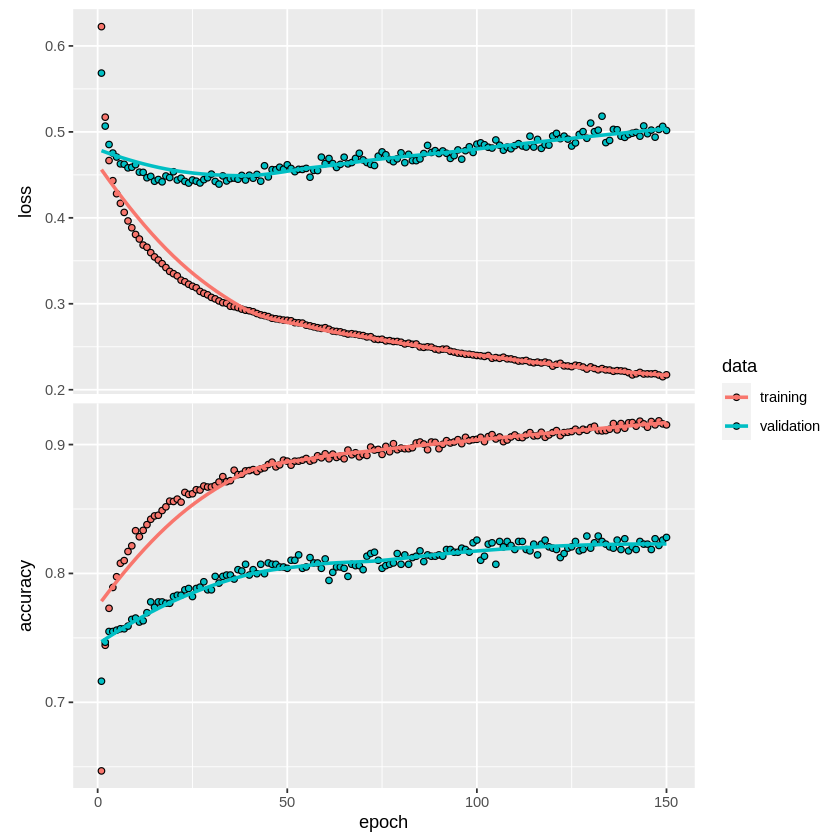

In [ ]:
plot(history)

In [ ]:
# Evaluamos el modelo Keras de los estimadores
metrics <- model %>% evaluate(X_train, y_train,)
metrics

loss  accuracy 
0.2046848 0.9228363

In [ ]:
# Hacemos predicciones sobre los datos de prueba
y_pred <- model %>% predict(X_test)
y_pred <- round(y_pred)
head(y_pred)

0
0
0
0
0
0


# 3.2 Evaluación del modelo

In [ ]:
# Elaboramos la matriz de confusión de los predictores
confusionMatrix(as.factor(y_test), as.factor(y_pred))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 458  90
         1  75 336
                                          
               Accuracy : 0.8279          
                 95% CI : (0.8025, 0.8513)
    No Information Rate : 0.5558          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.6503          
                                          
 Mcnemar's Test P-Value : 0.2758          
                                          
            Sensitivity : 0.8593          
            Specificity : 0.7887          
         Pos Pred Value : 0.8358          
         Neg Pred Value : 0.8175          
             Prevalence : 0.5558          
         Detection Rate : 0.4776          
   Detection Prevalence : 0.5714          
      Balanced Accuracy : 0.8240          
                                          
       'Positive' Class : 0               
                              